In [289]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
%matplotlib inline

import statsmodels.api as sm

## Import Data from CSV

In [290]:
data = pd.read_csv("CT_survey_data.csv",index_col=0)
print(data.columns)

Index(['EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
       'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage', 'Consent Form', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q9_4_TEXT', 'Q10_1', 'Q10_6', 'Q10_2', 'Q10_3', 'Q10_5', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q14_5_TEXT', 'Q15'],
      dtype='object')


## Data Preparation
This step involves:
* Removing columns which are not needed
* Renaming columns for understandability
* Changing data types from objects to integer and float
* Normalisation of data removing duplicates in columns: Nationality, Institution, Other course, Length of experience, Other source of experience and Skills learnt
* Removing rows of participants which did not give a perceived difficulty for all 5 skills, and creating two datasets for those with and without prior experience

In [291]:
data.drop(['EndDate','Status','IPAddress','Progress','Duration (in seconds)','RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','Consent Form'], inplace=True, axis=1)

In [292]:
data.rename(columns={'Q5': 'Age', 'Q6': 'Gender', 'Q7':'Nationality', 'Q8':'Institution', 'Q9':'Course', 'Q9_4_TEXT':'Other course', 'Q10_1':'Abstraction', 'Q10_6':'Algorithmic Thinking', 'Q10_2':'Decomposition', 'Q10_3':'Evaluation', 'Q10_5':'Generalisation', 'Q11':'Y/N Past Experience', 'Q12':'Age of experience', 'Q13':'Length of experience, in years', 'Q14':'Source of experience', 'Q14_5_TEXT':'Other, source of experience', 'Q15':'Skills learnt'}, inplace=True)

In [293]:
data.reset_index(inplace = True, drop = False)

In [294]:
data.drop([0, 1], inplace=True)

In [295]:
data.reset_index(inplace = True, drop = True)

In [296]:
data['Nationality'] = data['Nationality'].replace(to_replace=['Irish ','irish','irish ','Ireland','Irlandy'], value='Irish')
data['Nationality'] = data['Nationality'].replace(to_replace=['Rumano'], value='Romanian')
data['Nationality'] = data['Nationality'].replace(to_replace=['Brasil'], value='Brazilian')
data['Nationality'] = data['Nationality'].replace(to_replace=['China','Chinese '], value='Chinese')
data['Nationality'] = data['Nationality'].replace(to_replace=['Indian '], value='Indian')
data['Nationality'] = data['Nationality'].replace(to_replace=['Polish '], value='Polish')
data['Nationality'] = data['Nationality'].replace(to_replace=['ESPAÑOLA','Española','Español','española','Española ','Spainish','Española - Japonesa - Chilena','Spain','ESPAÑA'], value='Spanish')

In [297]:
data.Nationality.unique()

array(['Spanish', 'Romanian', 'Brazilian', 'Irish', 'Polish',
       'Irish Russian', 'Indian', 'British', nan, 'Romanian-Irish',
       'White', 'Irish and Moldovan', 'American', 'Belgian', 'Swedish ',
       'Nigerian-Irish ', 'Brazilian ', 'Dutch', 'Russian ',
       'Afghanistan', 'Irish/Albanian', 'United States/United Kingdom',
       'French', 'Latvian/Bulgarian ', 'Turkish ', 'Jordanian',
       'Kuwaiti ', 'Irish/Basque', 'Azerbaïdjanais ', 'Pakistani',
       'Irish and Russian', 'Nigerian / Irish', 'Malaysian', 'Canadian',
       'Irish-Ukrainian', 'Ukrainian', 'Chinese', 'Latvian',
       'Indian-Irish', 'Russian', 'South African ', 'American ',
       'Vietnamese', 'Irish/Serbian', 'Irish/German', 'Irish/Asian ',
       'German/ irish', 'Hong Kong', 'Slovak', 'Portuguese',
       'Irish/UK/USA (triple citizen)', 'Croatian', 'Norwegian',
       'Egpytian', 'Somali'], dtype=object)

In [298]:
data['Institution'] = data['Institution'].replace(to_replace=[
    'IES Eduardo merello','I.E.S Eduardo Merelló','IES EDUARDO MERELLO','I. E. S Eduardo Merello ','I.E.S Eduardo Merello','Grado Superior','I.E.S. Eduardo Merelló','Ies Eduardo merello','Ies eduardo merello', 'IES Eduardo Merello ','IES Eduardo Merelló', 'EDUARDO MERELLO ','EDUARDO MERELLO','Eduardo Merello','IES. EDUARDO MERELLO'], 
    value='IES Eduardo Merello')

data['Institution'] = data['Institution'].replace(to_replace=['Trinity', 'Trinity ','Trinity College Dublin','Trinity college dublin ', 'TCD', 'Trinity college Dublin ', 'Trinity college Dublin','Trinity college ', 'Trinity College dublin', 'Trinity college dublin', 'Trinners ',  'trinity collage', 'Trinity College Dublin ', 'Trinity college','Trinity College ', 'Trinity College', 'tcd','Trinity College, University of Dublin','University of Dublin, Trinity College','Trintiy', 'Trinity engineering ', 'trinity college dublin','trinity college', 'Tcd', 'trinity', 'Trinity College, Dublin'], 
    value='TCD')

data['Institution'] = data['Institution'].replace(to_replace=['Universidad Rey Juan Carlos', 'Universidad ', 'URJC Fuenlabrada',
       'Universidad','Universidad Rey Juan Carlos Fuenlabrada', 'Universidad Sevilla y URJC'],
    value='URJC')

data['Institution'] = data['Institution'].replace(to_replace=['TU Dublin', 'TUD', 'TuDublin', 'TUD grangegorman', 'Technological University Dublin','Tu Dublin', 'Tech Uni Dublin', 'TUD City Campus', 'Tud','Technological University Dublin ','Technology university Dublin ', 'Tudublin aungier street','TUDublin', 'TUD Grangegorman', 'TU Dublin ','Technical university of dublin', 'TU Dublin city campus', 'Tu dublin', 'tud aungier street', 'Tudublin ', 'Tu dublin ','Tu Dublin City campus', 'TU Dublin City Centre ', 'Technological university dublin', 'tudublin ',  'TU Dublin City Campus', 'TU Tallaght'],
    value='TUDublin')


In [299]:
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['1 año','1 year','1 year total', '1year','1 year ','A year (cumulative)','a year '], 
                                    value='1')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['1.5 years'], 
                                    value='1.5')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['2 years ','2 AÑOS','2 años','2', '2 years','Like each summer --- approx. 2 years'],
                                    value='2')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['2/3 years ', '2.5 years','un año y 6 meses', '2 or 3 years'],
                                    value='2.5')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['on and off for a few years, then stagnant until i was 16','~6 months at first, then around 3-4 years on and off','3-4 years', '3 years', '3 years until the age of 16 weekly ','3 years ','3 years, on and off '],
                                    value='3')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['last semester.','Cinco meses','6 months','6months','~6 months','6 months ','6'],
                                    value='0.5')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['1 month ','1 month','I didnt do much just a little in secondary school ','2 meses','1 mes','2 Months','2 months','2 montsh', '1 or 2 months split across my first 4 years in post primary school and a small amount from trying to follow a tutorial on making a game in unity3D'],
                                    value='0.167')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['Couple of months','4 months','4 months ','3 months ','a few months ', '3 months'],
                                    value='0.25')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['6 years 7 months','6 years'],
                                    value='6')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['5 years in secondary school','5 years','7 years on and off','~5 years, very basic programming on and off'],
                                    value='5')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['8 months','9 months','A few months. One or two projects in middle school.'],
                                    value='0.67')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['34 years'],
                                    value='34')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['Not a clue, a few sessions over a few weeks','2 weeks','.25 month','Week','0.5 months'],
                                    value='0.019')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['4 years','Four years on and off, picked up with the leaving cert compsci curriculum'],
                                    value='4')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['10 years','since I was 7 (11 years)'],
                                    value='10')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['21 years'],
                                    value='21')
data['Length of experience, in years'] = data['Length of experience, in years'].replace(to_replace=['10 years'],
                                    value='10')

In [300]:
data['Length of experience, in years'].unique()

array([nan, '1', '2', '0.167', '4', '0.5', '6', '5', '0.25', '3', '8',
       '1.5', '0.67', '34', '0.019', '2.5', '83', '20', '10', '73', '7',
       '21', '9'], dtype=object)

In [301]:
data['Age of experience'].unique()

array([nan, '26', '18', 'Con 14', '20', '14', '22', 'A los 15 años',
       '15 Años', '16', '15', '13', '12', '10', '17',
       '4TH Year in Secondary School', '19', '<1', '8', '11', '9',
       '4 months', '13 / 14', '18 - The summer before starting college',
       '1 st year ', 'Around 14-15', '2nd year school', '3 months ',
       '18 años', '7', 'At about 16'], dtype=object)

In [302]:
data['Age of experience'] = data['Age of experience'].replace(to_replace=['A los 15 años','15 Años','4TH Year in Secondary School','Around 14-15','<1'], value='15')
data['Age of experience'] = data['Age of experience'].replace(to_replace=['13 / 14', '2nd year school','Con 14'], value='14')
data['Age of experience'] = data['Age of experience'].replace(to_replace=['At about 16','4 months'], value='16')
data['Age of experience'] = data['Age of experience'].replace(to_replace=['18 años', '18 - The summer before starting college','1 st year ', '3 months '], value='18')

In [303]:
data['Age of experience'].unique()

array([nan, '26', '18', '14', '20', '22', '15', '16', '13', '12', '10',
       '17', '19', '8', '11', '9', '7'], dtype=object)

In [304]:
print(data.dtypes)

StartDate                         object
Finished                          object
UserLanguage                      object
Age                               object
Gender                            object
Nationality                       object
Institution                       object
Course                            object
Other course                      object
Abstraction                       object
Algorithmic Thinking              object
Decomposition                     object
Evaluation                        object
Generalisation                    object
Y/N Past Experience               object
Age of experience                 object
Length of experience, in years    object
Source of experience              object
Other, source of experience       object
Skills learnt                     object
dtype: object


In [305]:
data.fillna(0,inplace=True)
data[['Age','Abstraction','Algorithmic Thinking','Decomposition','Evaluation','Generalisation','Age of experience']] = data[['Age','Abstraction','Algorithmic Thinking','Decomposition','Evaluation','Generalisation','Age of experience']].astype(str).astype(int)
data['Length of experience, in years'] = data['Length of experience, in years'].astype(str).astype(float)
print(data.dtypes)

StartDate                          object
Finished                           object
UserLanguage                       object
Age                                 int64
Gender                             object
Nationality                        object
Institution                        object
Course                             object
Other course                       object
Abstraction                         int64
Algorithmic Thinking                int64
Decomposition                       int64
Evaluation                          int64
Generalisation                      int64
Y/N Past Experience                object
Age of experience                   int64
Length of experience, in years    float64
Source of experience               object
Other, source of experience        object
Skills learnt                      object
dtype: object


### Create column for gender in binary

In [306]:
data['Gender, binary'] = np.where(data['Gender'] == 'Male', 1, 0)

### Create column for average difficulty - mean of Abstraction, AT, Decomposition, Evaluation and Generalisation

In [307]:
data['Avg Difficulty'] = data[['Abstraction', 'Algorithmic Thinking', 'Decomposition', 'Evaluation', 'Generalisation']].mean(axis=1)

In [308]:
data.head()

,StartDate,Finished,UserLanguage,Age,Gender,Nationality,Institution,Course,Other course,Abstraction,Algorithmic Thinking,Decomposition,Evaluation,Generalisation,Y/N Past Experience,Age of experience,"Length of experience, in years",Source of experience,"Other, source of experience",Skills learnt,"Gender, binary",Avg Difficulty
0,2022-02-04 14:15:05,True,ES-ES,25,Male,Spanish,IES Eduardo Merello,Other,GS ARI,4,1,3,4,2,No,0,0.0,0,0,0,1,2.8
1,2022-02-04 17:34:57,True,ES-ES,28,Female,Spanish,IES Eduardo Merello,Other,CFGS automatización y robótica industrial,2,2,0,3,2,Yes,26,1.0,Online (such as code.org or khanacademy.org),0,Programación ABAP (SAP),0,1.8
2,2022-02-04 17:45:33,True,ES-ES,19,Male,Spanish,IES Eduardo Merello,Other,Automatización y Robótica Industrial,2,1,3,1,3,No,0,0.0,0,0,0,1,2.0
3,2022-02-04 17:48:18,True,ES-ES,19,Male,Spanish,IES Eduardo Merello,Engineering,0,4,4,2,2,4,No,0,0.0,0,0,0,1,3.2
4,2022-02-04 17:49:03,True,ES-ES,24,Male,Spanish,IES Eduardo Merello,Other,Automatización y robótica industrial,3,1,3,3,3,No,0,0.0,0,0,0,1,2.6


### Remove rows which have not given perceived difficulty for the 5 skills and did not answer to whether they had past experience or not

Current row count

In [309]:
len(data.index)

394

In [310]:
data = data[(data['Abstraction'] != 0) & (data['Algorithmic Thinking'] != 0) & (data['Decomposition'] != 0) & (data['Evaluation'] != 0) & (data['Generalisation'] != 0) & (data['Y/N Past Experience'] != 0)]

In [311]:
len(data.index)

244

### Participants without prior experience

In [312]:
noExperience = data[data['Y/N Past Experience'] == 'No']
len(noExperience.index)

131

### Participants with prior experience

In [313]:
experience = data[data['Y/N Past Experience'] == 'Yes']
len(experience.index)

113

### Participants with prior experience, have given age of experience and legnth of experience (<18 years to remove outliers)

In [314]:
experience = experience[(experience['Age of experience'] != 0) & (experience['Length of experience, in years'] != 0) & (experience['Length of experience, in years'] < 18)]
len(experience.index)

108

## Data Exploration

### All data

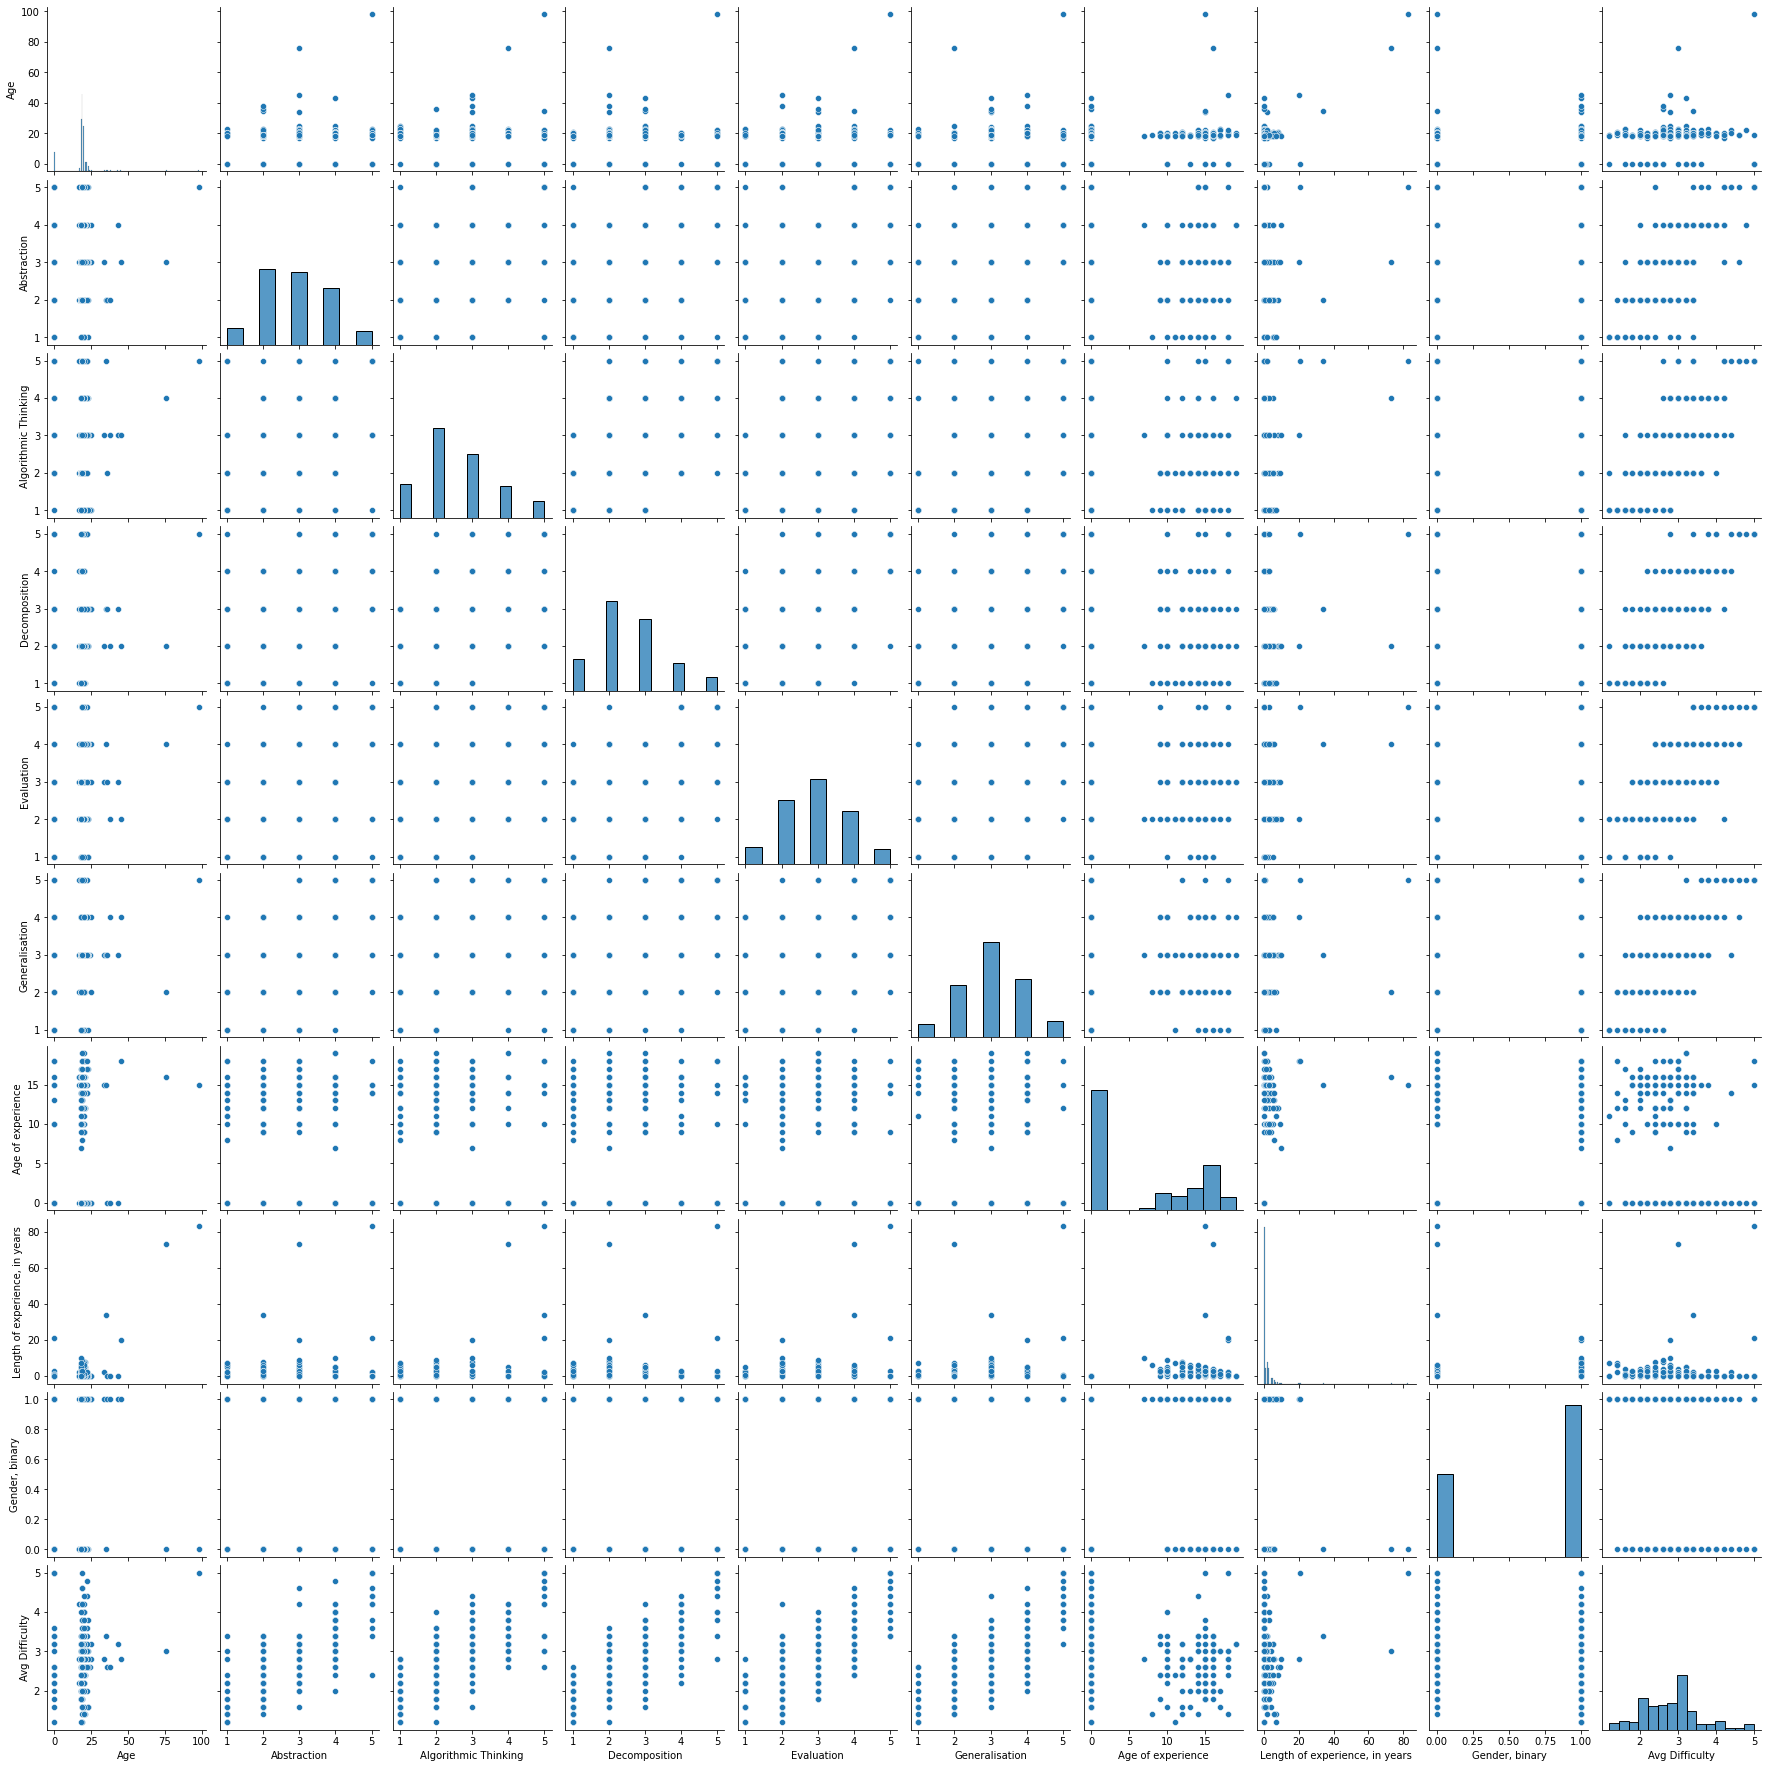

In [71]:
fig = sns.pairplot(data)

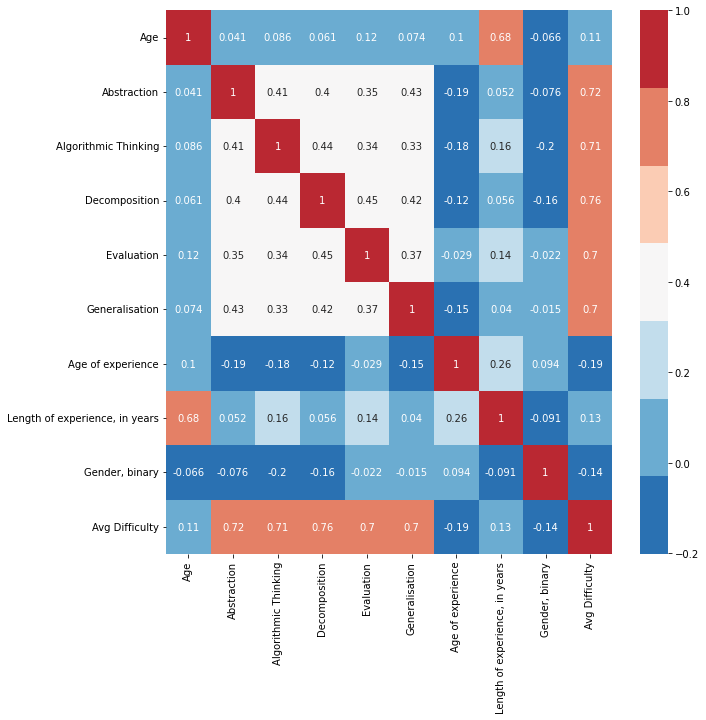

In [286]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap= sns.color_palette("RdBu_r", 7))
fig.savefig("corr_heatmap.png", bbox_inches='tight')

### With experience

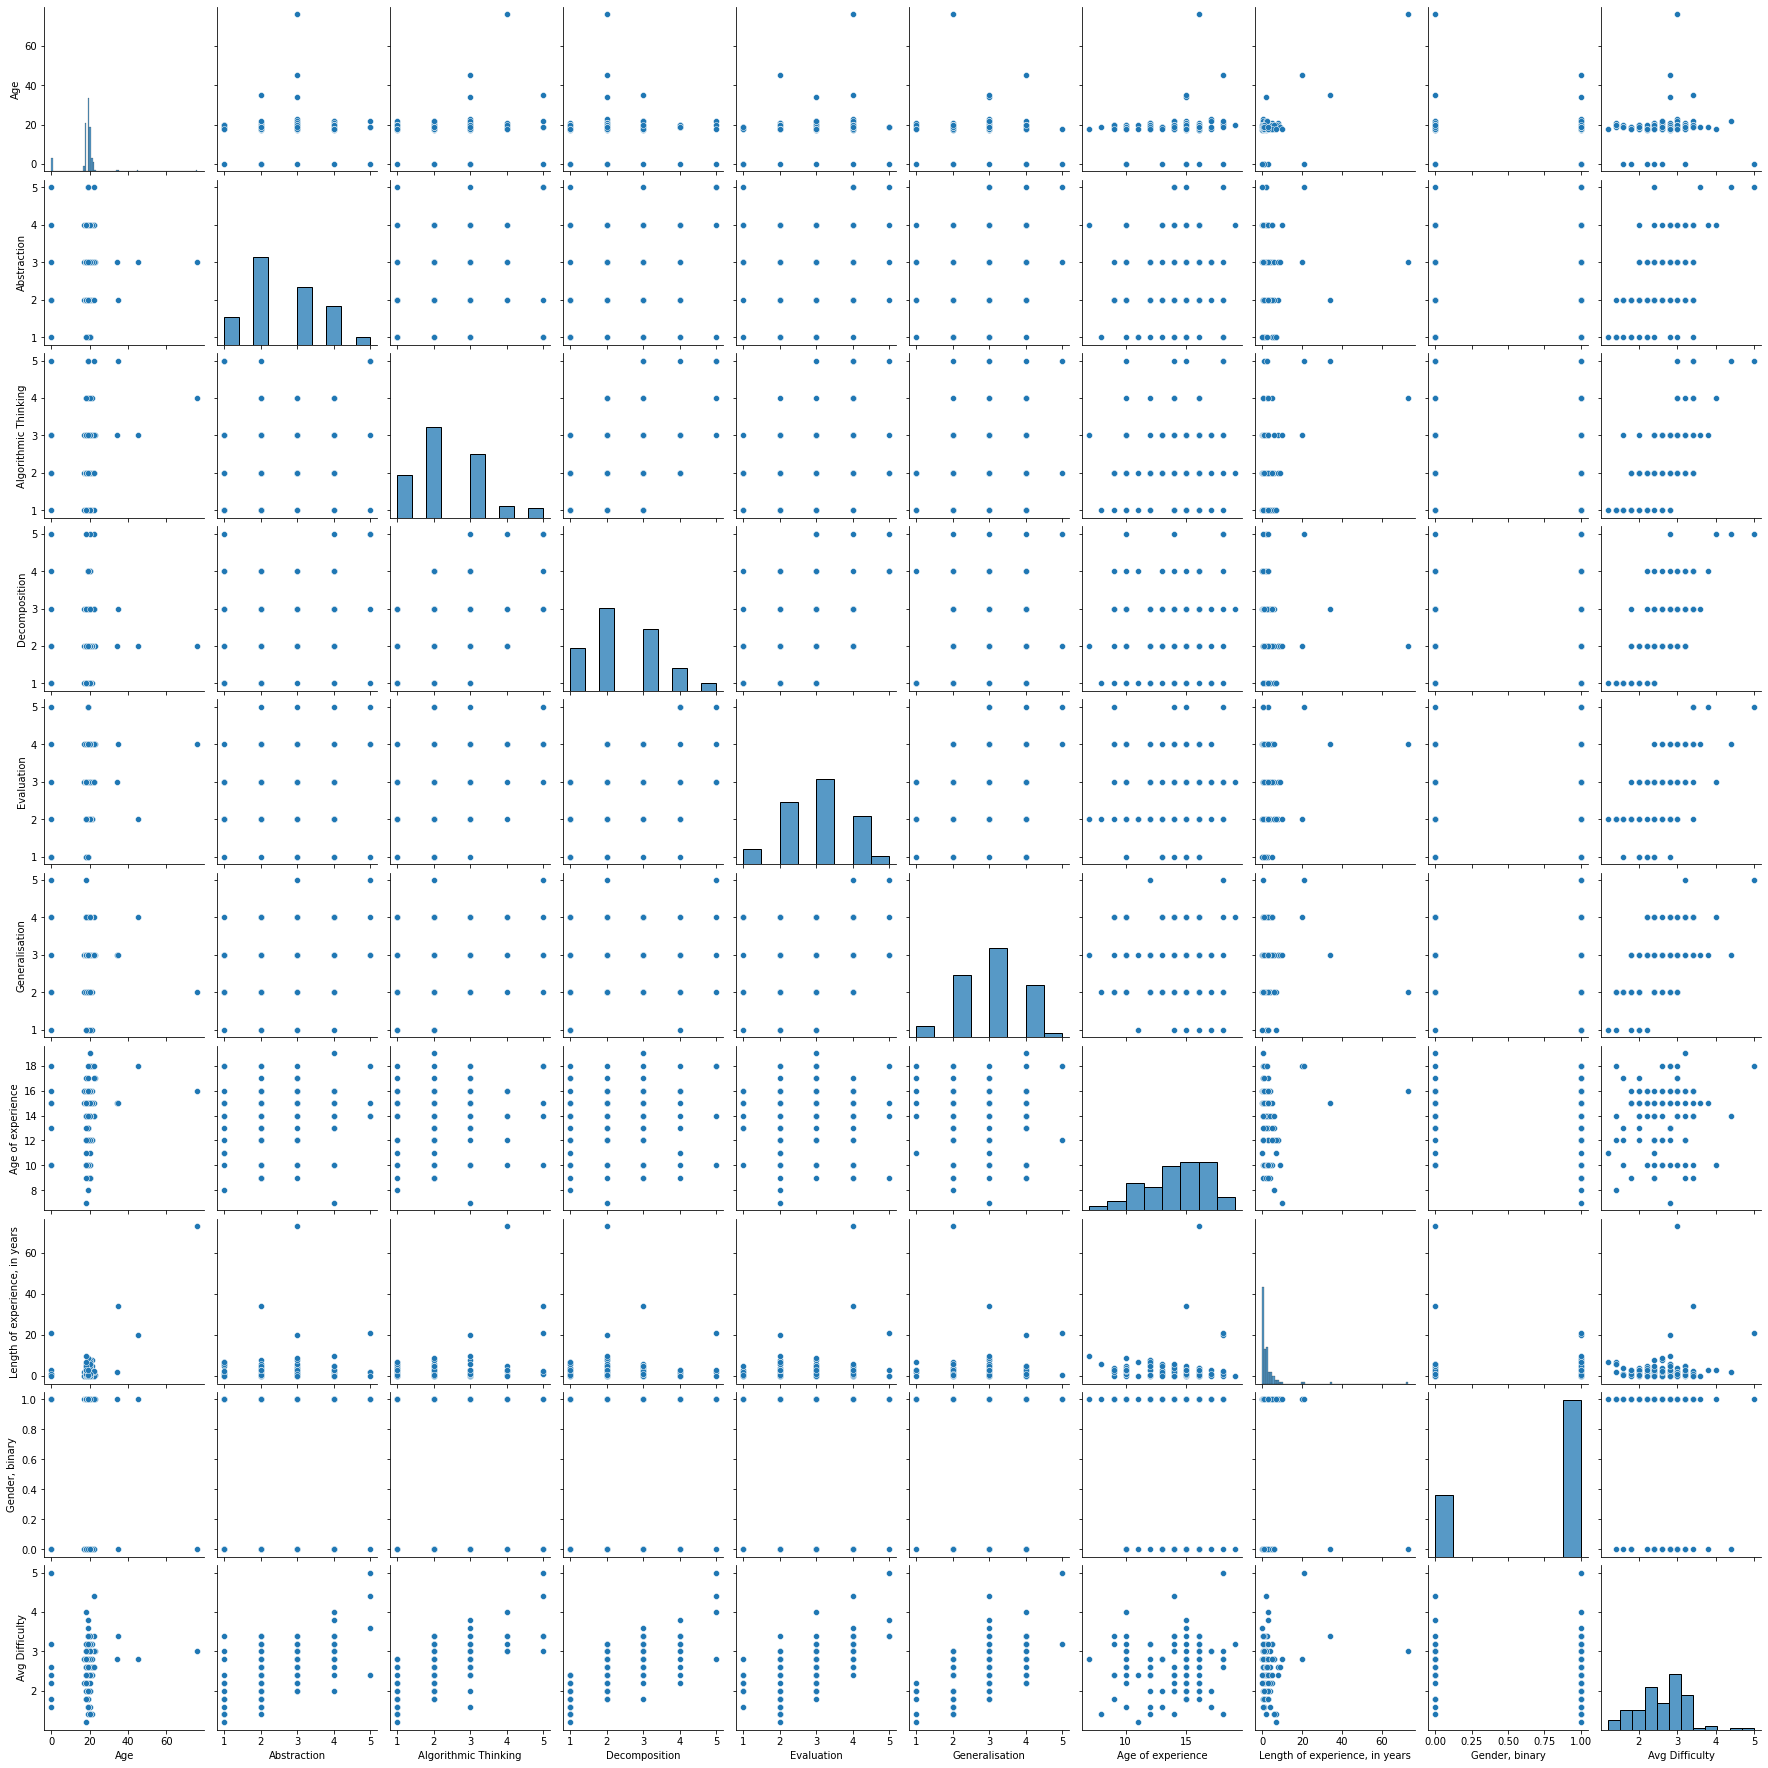

In [287]:
fig = sns.pairplot(experience)

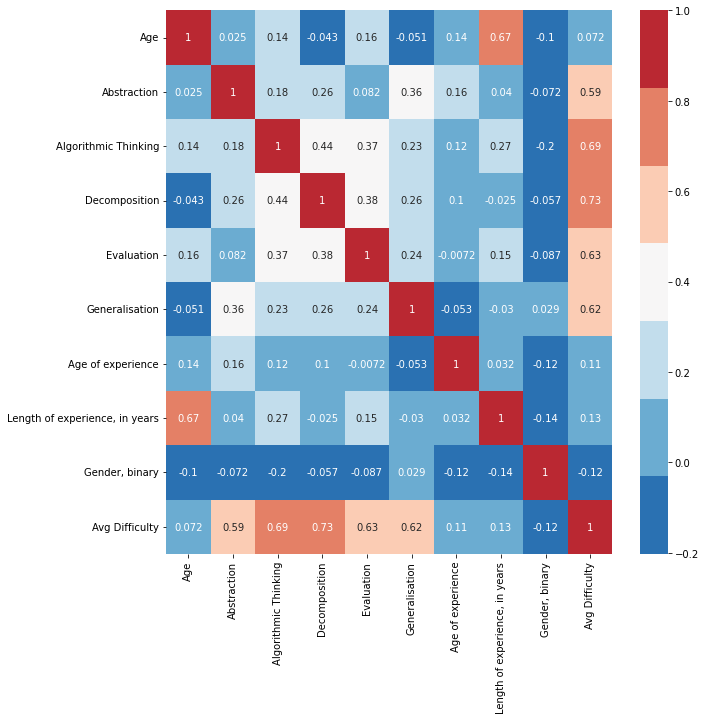

In [288]:
fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10))
sns.heatmap(experience.corr(),annot=True,cmap= sns.color_palette("RdBu_r", 7))
fig.savefig("corr_heatmap_experience.png", bbox_inches='tight')

### Deeper exploration of participants with experience

<AxesSubplot:xlabel='Age of experience', ylabel='Avg Difficulty'>

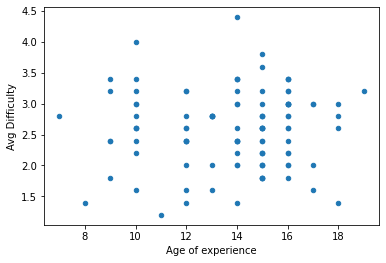

In [252]:
experience.plot(x='Age of experience', y='Avg Difficulty', kind='scatter')

<AxesSubplot:xlabel='Length of experience, in years', ylabel='Avg Difficulty'>

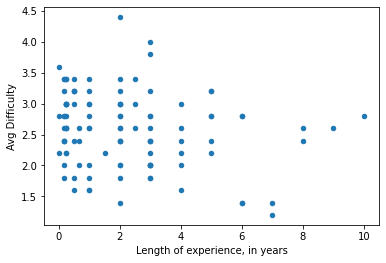

In [253]:
experience.plot(x='Length of experience, in years', y='Avg Difficulty', kind='scatter')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

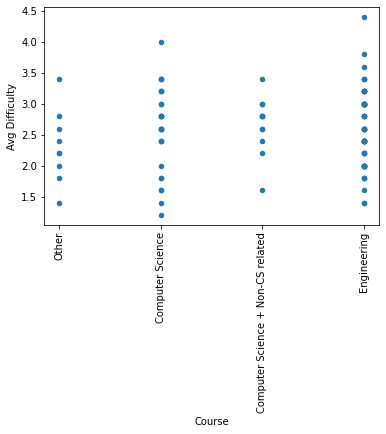

In [257]:
experience.plot(x='Course', y='Avg Difficulty', kind='scatter')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Gender', ylabel='Age of experience'>

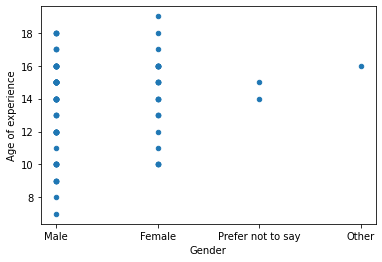

In [193]:
experience.plot(x='Gender', y='Age of experience', kind='scatter')

In [195]:
experience['Age of experience'].mean()

13.787037037037036

In [196]:
experience['Length of experience, in years'].mean()

2.2143888888888887

# Does having past experience make grasping CT skills easier? 
Statistical singnificance
Nul hypothesis is 0 - are these two the same or is there significante difference? <br/>
-3.87 - z value. <br/>
0.0001 - <br/>
Based on the chart, 99%  certainty that they are different. Significantly to a high degree

In [104]:
meanDifficultyWithNoExperience = noExperience['Avg Difficulty'].mean()
meanDifficultyWithNoExperience

2.980152671755725

In [105]:
meanDifficultyWithExperience = experience['Avg Difficulty'].mean()
meanDifficultyWithExperience

2.6194690265486726

In [111]:
stests.ztest(experience['Avg Difficulty'], noExperience['Avg Difficulty'], value=0) 

(-3.87034357346415, 0.00010868207574903085)

# Linear regression

In [228]:
y = experience['Avg Difficulty']
X = experience[['Length of experience, in years', 'Age of experience', 'Gender, binary']]

In [229]:
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()

In [230]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Avg Difficulty   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.304
Date:                Wed, 09 Mar 2022   Prob (F-statistic):              0.277
Time:                        23:02:57   Log-Likelihood:                -107.66
No. Observations:                 113   AIC:                             223.3
Df Residuals:                     109   BIC:                             234.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.3755      0.360      6.593      0.000       1.661       3.090
Length of experience, in years     0.0087      0.008      1.134      0.259      -0.007       0.024
Age of experience                  0.0225      0.024      0.950      0.344      -0.024       0.069
Gender, binary                    -0.1367      0.136     -1.008      0.316      -0.406       0.132
==============================================================================
Omnibus:                        4.490   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.129
Skew:                           0.321   Prob(JB):                        0.127
Kurtosis:                       3.682   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(experience['Age of experience'], experience['Length of experience, in years'])